<a href="https://colab.research.google.com/github/gachet/000mis-colabs/blob/master/Ejemplo_EDA_1_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis Exploratorio

**¿Qué es el análisis exploratorio de datos?**

El análisis exploratorio de datos (*EDA, Exploratory Data Analysis*) es entender los datos resumiendo sus principales características, generalmente utilizando algún tipo de representación gráfica. Este es un paso muy importante para llegar a la modelización de los datos que luego se puede utilizar para aplicar Machine learning para algún tipo de análisis predictivo. Explorar los datos no es tarea sencilla, suele llevar una cantidad de tiempo considerable. A través del análisis exploratorio podemos definir claramente el problema.

**¿Cómo realizamos el análisis exploratorio?**

Bueno, esta es LA pregunta. Y lamentablemente como suele suceder en estos casos la respuesta es: Depende. Básicamente porque depende del conjunto de datos que se está analizando. No existe una receta que se aplique para todos los casos. La idea fundamental es aplicar diferentes herramientas y estrategias que permitan tener una mejor idea. Puede ser un proceso iterativo en donde cada ciclo hace que uno tenga mejor entendimiento sobre los datos.

**¿Qué datos vamos a explorar?**

Vamos a analizar datos sobre autos. El dataset tiene más de 10k registros con más de 10 columnas que detallan características de los autos como por ejemplo: el tipo de combustible que usan, la potencia del motor, la caja de trasmisión que usan, el consumo en ciudad y en ruta y mucho más. En este ejercicio vamos a explorar los datos y entenderlos.

## 1. Importamos los paquetes necesarios

A continuación tenemos los paquetes que vamos a utilizar en este ejercicio. Esto lo hacemos siempre al principio.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualización
import matplotlib.pyplot as plt             #visualización
%matplotlib inline


## 2. Cargamos los "datos" en un "dataframe"

El dataset que usaremos viene en un formato de archivo q CSV (*comma separated values*).

Para leer el archivo tenemos que usar el método `read_csv` que viene con Pandas. Como argumento le tenemos que pasar el nombre del CSV (incluyendo su ubicación), en este caso, le pasamos el enlace de un fichero residente en Google Drive  se llama( `car-data.csv`). Como a Pandas lo importamos con el nombre `pd` tenemos que usar la siguiente sintaxis:

In [ ]:
df = pd.read_csv("https://drive.google.com/uc?id=1ZxgvOaZPwOrYSJG10qDveRRIDB0BisTm")

In [ ]:

 # Veamos las 5 primeras filas



Si queremos ver los últimos 5 registros, usamos `tail` (cola):

In [ ]:
## Miremos ahora las últimas 5 filas


Usemos el atributo `shape` del *dataframe* que nos va a devolver una tupla con la cantidad de registros y la cantidad de columnas por registro:

Y por último podemos usar el atributo `describe` del *dataframe* para conocer los estadísticos descriptivos básicos del dataframe como:

* count: Cantidad de valores no nulos
* mean: Media
* std: Desviación estandar
* min/25%/50%/75%/max: Valores mínimo, de percentiles 25, 50 y 75 y máximo.


## 3. Revisando los tipos de datos de cada columna

Este paso es importante porque muchas veces por ejemplo, el precio o algún otro dato puede venir como una cadena de texto cuando en realidad queremos que sea un número de algún tipo. Si éste fuera el caso, tenemos que hacer la transformación del tipo de dato en la columna.

En este caso en particular, por suerte, los datos vinieron correctamente.

In [ ]:
## revisar los tipos de cada columna


## 4. Eliminando columnas

Este paso es necesario en cada análisis exploratorio  para evitar tener columnas  que no vayan a aportarte información en el análisis.

En este caso, a modo de ejemplo, podemos eliminar las columnas: Market Category, Vehicle style, Popularity, Number of doors, Vehicle Size.

In [ ]:
## Eliminar las coilumnas


In [ ]:
# comprobar
df.shape

## 5. Renombrando las columnas

En esta etapa lo que hacemos es ponerle un nombre que nos resulte más descriptivo. Muchas veces los datos vienen con nombres en las columnas un tanto confusos y siempre es mejor "explícito". Es un buen ejercicio que **mejora la legibilidad**.
"Engine Fuel Type":"Combust","Engine HP": "HP", "Engine Cylinders": "Cilindros", "Transmission Type": "Transmision", "Driven_Wheels": "Tracción","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Precio" }

## 6. Eliminando registros duplicados

Es altamente probable que en un dataset de +10k registros algunos de ellos se encuentren duplicados. Tener registros duplicados en nuestro análisis puede alterar los resultados y por ende, nuestras conclusiones.

Con `shape` vemos que actualmente el *dataframe* tiene 11914 registros con 11 columas.

In [ ]:
## Utilizar shape


Eliminar los duplicados con un *dataframe* de Pandas es tan complejo como llamar al método `drop_duplicates`. Este médoto nos devuelve un *nuevo dataframe*, si no queremos tener un nuevo *dataframe* lo que hacemos es simplemente darle el mismo nombre al nuevo:

In [ ]:
## Ver como nos queda el dataframe con df.shape
df.shape

¿Cuántos Registros Duplicados había en nuestro dataframe"

## 7. Eliminando registros con valores incompletos

Los *dataframes* de Pandas tienen un método `count` que nos informa por columna cuántos registros tienen valores:

In [ ]:
##utilizar el método count para ver cuántos registros tienen valores


Este paso es muy similar al anterior, sólo que esta vez vamos a eliminar los registros que no tengan valores.
Es común en vez de eliminar estos registros, reemplazar los valores faltantes por el valor promedio. En este ejemplo, los valores faltantes están en el orden de las decenas mientras que tenemos un total de 10k registros. Es decir, el porcentaje es muy bajo y por eso optamos por descartar esos valores.

Notemos que en la columna `HP` tenemos 10856 registros con datos sobre un total de 10925. Es decir, hay 69 registros que no tienen un valor.
Y en la columna `Cilindros` tenemos 10895 registros con datos. Es decir, hay 30 registros que no tienen un valor.

También podemos comprobarlo preguntándole al *dataframe* que nos diga si hay datos vacíos o en *null* y pidiéndole que nos haga la suma de esos:

In [ ]:
##  Cuál es la suma de los registros nulos nulos


Para borrar esos registros que no tienen datos, registros que tienen "datos no disponibles" (del inglés *not available*) usamos el método `dropna`.

In [ ]:
## quitar los nulos del dataframe


Ahora nuestro dataset sabemos que no tiene registros duplicados y que todos nuestros registros tienen valores en las 11 columnas.

In [ ]:
## comprobar que no tenermos registros nulos




---



## 8. Aplicando transformaciones


El origen de estos datos utiliza el sistema inglés. Por eso tenemos MPG, millas por galón. No sé ustedes, pero yo prefiero utilizar el sistema internacional. Sabiendo que 1 MPG equivale a 0.425144 KPL (Kilómetros por litro) podemos transformar esas columnas para hacer una mejor interpretación.

Si llamamos al *dataframe* con el nombre de una columna podemos operar con esa columna:

In [ ]:
df["MPG-H"]

In [ ]:
## transformar la columna MPG-H a MPG-H * 0.425144



In [ ]:
df["MPG-H"]

Lo mismo hacemos para la columna `MPG-C`:


Y ahora deberíamos cambiar el nombre, porque ese nombre ya no es significativo.  
MPG-H-->KPL-R  
MPG-C-->KPL-C


In [ ]:
## Cambiar los nombres
df.head(5)

In [ ]:
df.shape

In [ ]:

df.head(5)

In [ ]:
##obtener las marcas mas populares (10 primeras)



In [ ]:
popular_brands

In [ ]:
## Hagamos un diagrama de barras



Cambiemos los valores de la columna Combust a sólo 4  
 extra95', 'extra98', 'diesel','otro'

In [ ]:
df["Combust"] = np.random.choice(['gas95','gas98','diesel','otro'],10895)
df.head()

In [ ]:
## Hagamos un gráfico circular del combustible preferido

plt.figure(figsize=(10,10))
plt.title("Combustible preferido")
space = np.ones(4)/25
df['Combust'].value_counts().plot(kind='pie', explode=space, autopct='%.3f%%', wedgeprops=dict(width=0.15), startangle=40, figsize=(5,5), shadow=True, cmap='cividis', legend=True);


In [ ]:
space

## 9. Detectando valores atípicos

Un valor atípico es un punto o un set de puntos que son diferentes de otros en el dataset. A veces puede ser valores que están muy por debajo o muy por encima. En general suele ser una buena medida quitar estos valores que no resultan representativos. Estos valores atípicos suelen generar modelos que no resultan representativos. Es por ello que es una buena alternativa removerlos del dataset.  

Abajo vemos cómo con Boxplot (o diagrama de cajas) podemos observar los valores atípicos rápidamente.

Si quieren más info sobre cómo detectar valores atípicos pueden ver el siguiente artículo de [towards data science](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba).

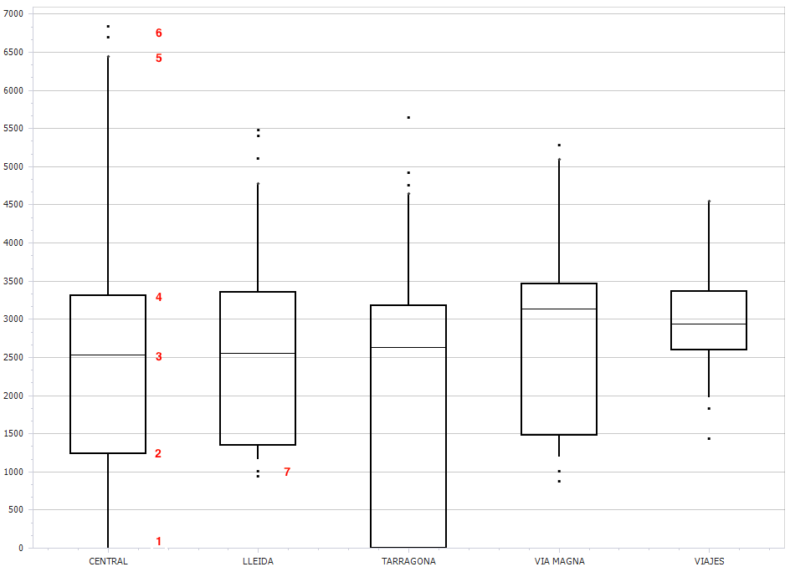

* Primer cuartil: el 25% de los valores son menores o igual a este valor (punto 2 en el gráfico anterior).   
* Mediana o Segundo Cuartil: Divide en dos partes iguales la distribución. De forma que  el 50% de los valores son menores o igual a este valor (punto 3 en el gráfico siguiente).
+ Tercer cuartil: el 75% de los valores son menores o igual a este valor (punto 4 en el gráfico siguiente).
* Rango Intercuartílico (RIC): Diferencia entre el valor del tercer cuartil y el primer cuartil.




Analicemos por separado para evitar el sesgo de Precio

In [ ]:
sns.boxplot(x=df['Precio'])

In [ ]:
sns.boxplot(x=df['HP'])

In [ ]:
sns.boxplot(x=df['Cilindros'])

Analicemos la disperción del precio que como se ve, tiene valores outliers:

In [ ]:
df['Precio'].describe()

In [ ]:
sns.histplot(df['Precio'])

Se observa que Precio tiene una larga cola hacia la derecha.

Analicemos los deciles y algunos percentiles para entender esos valores anómalos. Para esto, usaremos el método quantile para calcular los percentiles.

* Los cuartiles, que dividen a la distribución en cuatro partes (corresponden a los cuantiles 0,25; 0,50 y 0,75);
* Los quintiles, que dividen a la distribución en cinco partes (corresponden a los cuantiles 0,20; 0,40; 0,60 y 0,80);
* Los deciles, que dividen a la distribución en diez partes;
* Los percentiles, que dividen a la distribución en cien partes.
* En el método Quantile: 0, 0.5 y 1 equivalen a valores mínimo, mediana y máximo.

In [ ]:
sns.boxplot(x=df['Precio'])
df['Precio'].quantile([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, .97, .98, .99, 1])

Recortemos los outliers... por ejemplo, recortando entre 200 y el cuartil del 90% (67208 como vimos en la celda anterior)

In [ ]:
corte_inferior = 200
corte_superior = df["Precio"].quantile(0.9)

df = df[(df["Precio"] < corte_superior) & (df["Precio"] > corte_inferior)]

Veamos cómo quedó la distribución después de eliminar los outliers:

In [ ]:
sns.boxplot(x=df['Precio'])

## 10. Gráficas

### Histograma

El histograma es una gráfica que representa la cantidad de ocurrencias de una variable en un intervalo determinado. En este dataset tenemos principalmente 10 diferentes marcas de fabricantes, pero es importante saber saber quién tiene la mayor cantidad de autos. Este histograma es una solución trivial para saber cuántos autos fabrica cada compañía.

In [ ]:
df["Make"].value_counts().plot(kind='bar', figsize=(20,5))
plt.title("Cantidad de autos por marca")
plt.ylabel('Cantidad de autos')
plt.xlabel('Marca');

In [ ]:
df.head()

### Mapas de calor

Los mapas de calor son gráficas que sirven para determinar variables dependientes. Una de las mejores maneras para encontrar estas relaciones es utilizando un mapa de calor. En el siguiente mapa de calor encontramos que el precio es una característica dependiente del tamaño del motor, de la potencia y de la cantidad de cilindros.

In [ ]:
df.corr(numeric_only=True)

In [ ]:
correlaciones= df.corr(numeric_only=True)
sns.heatmap(correlaciones,cmap="BrBG",annot=True)
correlaciones

### Dispersión

Usamos este tipo de gráficas para encontrar correlación entre 2 variables. Acá graficamos precio en función de la potencia.

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Precio'])
ax.set_xlabel('HP')
ax.set_ylabel('Precio')
plt.show()

Con la gráfica anterior vemos que se puede trazar claramente una línea de tendencia.